## 10) ✔️
Написать 4 функции порождения списка целых значений: отсортированного (по возрастанию и убыванию), случайного и почти отсортированного по возрастанию. Каждая функция принимает длину списка в качестве аргумента.

In [8]:
from random import randint

In [9]:
def sorted_asc(n: int)-> list:
    # возвращает отсортированный список целых значений по возрастанию (ascending order)
    lst = random_values(n)
    lst.sort()  # изменяет исходный список возвращает None, sorted() - создает новый объект
    return lst  


def sorted_desc(n: int)-> list:
    # возвращает отсортированный список целых значений по убыванию (descending order)
    lst = random_values(n)
    lst.sort(reverse=True)  # изменяет исходный список возвращает None, sorted() - создает новый объект
    return lst  


def random_values(n: int)-> list:
    # возвращает список случайных целых значений
    return [randint(0,100) for _ in range(n)]  # обе границв randint включены в диапазон


def almost_sorted_asc(n: int)-> list:
    # возвращает почти отсортированный список целых значений по возрастанию (ascending)
    list_nums = random_values(n)  
    #print(sorted(list_nums))
    
    # сортировка пузырьком, но в цикле вместо step=1, step=2  
    # т.е. в нашем случае, если список разбить на пары, то элементы каждой пары отсортированны
    # список отсортирован не полностью
    swap_bool = True
    while swap_bool:
        swap_bool = False
        for i in range(0, len(list_nums) - 1, 2):
            if list_nums[i] > list_nums[i + 1]:
                list_nums[i], list_nums[i + 1] = list_nums[i + 1], list_nums[i]
                swap_bool = True
    return list_nums


In [10]:
print(f'сортированный восход. {sorted_asc(10)}')
print(f'сортированный нисход. {sorted_desc(12)}')
print(f'случайные значения    {random_values(8)}')
print(f'почти сортированный   {almost_sorted_asc(21)}')

сортированный восход. [7, 13, 43, 44, 51, 62, 66, 72, 80, 96]
сортированный нисход. [98, 94, 94, 67, 46, 37, 33, 29, 28, 26, 20, 7]
случайные значения    [15, 25, 98, 81, 64, 98, 32, 81]
почти сортированный   [10, 42, 54, 65, 18, 79, 18, 52, 35, 91, 53, 98, 3, 50, 40, 70, 59, 98, 16, 61, 71]


## 11)     my ✔️
Реализовать функцию тестирования алгоритма сортировки. 

Процедура принимает на вход алгоритм сортировки и алгоритм порождения списка f_gen(list_len), генерирующий список заданной длины, количество повтороений теста и список длин использующихся для тестирования. 

Для каждой длины списка функция тестирования возвращает минимальное, среднее и наибольшее количество сравнений и перестановок.

bubble_sort
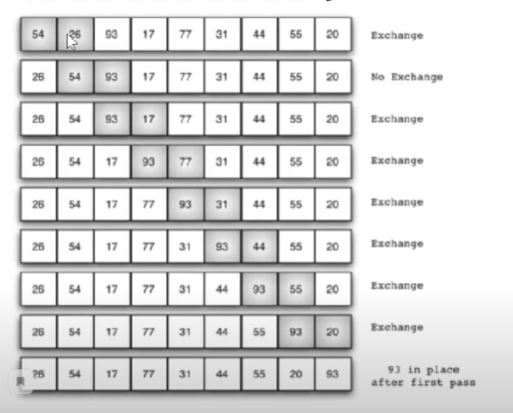

In [11]:
# сортировка пузырек, которая возвращает: отсортированный список, кол-во сравнений, кол-во перестановок

def bubble_sort(lst2)-> tuple:
    lst = lst2.copy()  # не изменяем исходные данные, т.к. все равно возвращяем новый объект
    swaps = 0
    compares = 0
    n = len(lst)
    for i in range(n-1, 0, -1):
        for j in range(i):
            compares += 1
            if lst[j] > lst[j+1]:
                swaps += 1
                lst[j], lst[j+1] = lst[j+1], lst[j]
    
    return lst, compares, swaps


In [12]:
# генератор списка
from random import sample

def gen_rand_list(length):
    return sample(range(0, length*10), length)  # случайная выборка нескольких элементов последовательности


In [13]:
# проверяем как работает генератор списка и сортировка
generated = gen_rand_list(10)
print(generated)
print(bubble_sort(generated))
#print(generated)


[71, 70, 76, 21, 66, 1, 87, 29, 62, 9]
([1, 9, 21, 29, 62, 66, 70, 71, 76, 87], 45, 30)


In [14]:
# ф-я тестирования сортировки

def test_sort(sort_alg, list_generator, n, list_lens):  # сортировка, порождение списка, кол-во повторений, список длин для тестирования
    results = {}  # будет словарь словарей вида {длина списка: {min_comp: '...', max_comp: '...', ..., avg_swaps: '...'}, ...}
    
    for length in list_lens:  # проводим тесты для каждой длины списка n раз (сначала для 3 n раз потом для 100 n раз итд)
        comparisons = []  # # список количества сравнени1 для каждой из n итерации
        swaps = []  # список количества swaps для каждой из n итерации
        
        for _ in range(n):  # повторяем тест n раз
            lst = list_generator(length)
            sorted_lst, n_compares, n_swaps = sort_alg(lst)   # сортируем список и получаем новый
            comparisons.append(n_compares)
            swaps.append(n_swaps)
            if sorted_lst != sorted(lst):
                return None  # если сортировка не отсортировала 
        
        # получаем минимальное, среднее и наибольшее количество сравнений 
        min_compares = min(comparisons)
        max_compares = max(comparisons)
        avg_compares = sum(comparisons) / len(comparisons)
        # получаем минимальное, среднее и наибольшее количество перестановок
        min_swaps = min(swaps)
        max_swaps = max(swaps)
        avg_swaps = sum(swaps) / len(swaps)
        
        results[length] = {  # добавляем все полученные значения в словарь с ключем дляины списка в данном случае
                                "min_comp": min_compares,
                                "avg_comp": avg_compares,
                                "max_comp": max_compares,
                                "min_swaps": min_swaps,
                                "avg_swaps": avg_swaps,
                                "max_swaps": max_swaps
                            }

    return results


In [15]:
# вызов ф-ии тестирования
# сортировка, порождение списка, кол-во повторений, список длин для тестирования
res = test_sort(bubble_sort, gen_rand_list, 20, [10, 100, 200])
for length in res:
    print(length)
    for d in res[length]:
        print(d, res[length][d])
    print()

10
min_comp 45
avg_comp 45.0
max_comp 45
min_swaps 11
avg_swaps 21.5
max_swaps 36

100
min_comp 4950
avg_comp 4950.0
max_comp 4950
min_swaps 2279
avg_swaps 2505.7
max_swaps 2858

200
min_comp 19900
avg_comp 19900.0
max_comp 19900
min_swaps 9471
avg_swaps 9985.05
max_swaps 10638



## 12) ✔️
Реализовать модификацию сортировки пузырьком: "камешек-пузырек" - с чередующимися проходами, приводящими к "всплытию" самого большого значения списка и "погружению" самого маленького значения из неотсортированной части списка.

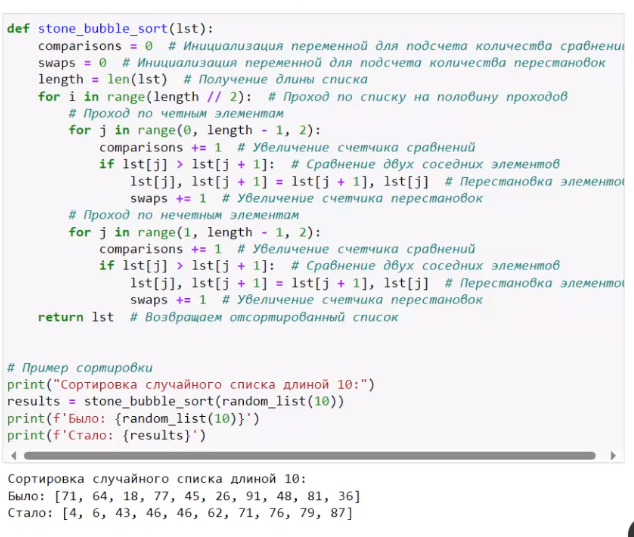

вайл тру убрать
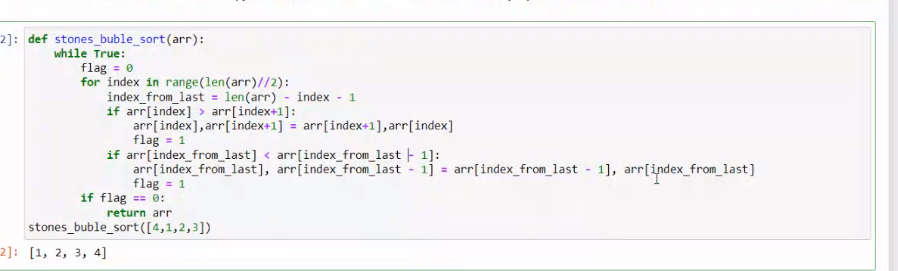
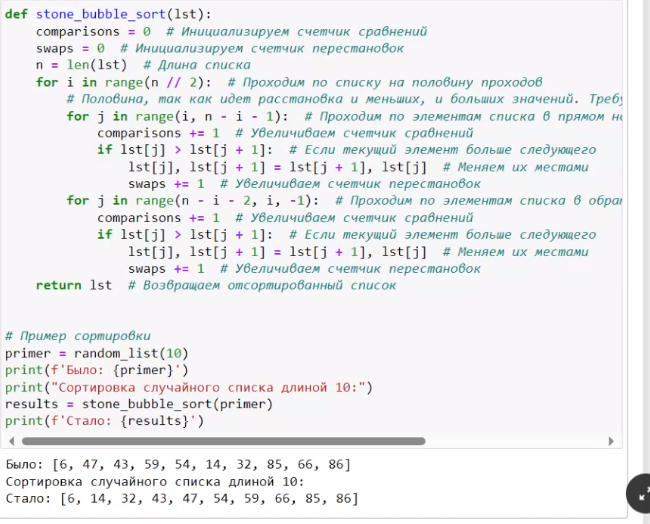

In [34]:
# камешек-пузырек сортировка, которая возвращает: отсортированный список, кол-во сравнений, кол-во перестановок

def stone_bubble_sort(lst2: list)-> tuple:
    comps = 0  # количество сравнений
    swaps = 0  # количество перемещений
    lst = lst2.copy()  # не изменяем исходный список
    for j in range(len(lst)-1):  # опускаем камешек
        #print(lst)
        comps += 1
        if lst[j] > lst[j+1]:  # больший элемент двигаем ближе к концу списка
            swaps += 1
            lst[j+1], lst[j] = lst[j], lst[j+1] 
            
            for i in range(j, 0, -1):  # поднимаем пузырек
                #print('o ',lst)
                comps += 1
                if lst[i-1] > lst[i]:  # меньший элемент двигаем ближе к началу списка
                    swaps += 1
                    lst[i], lst[i-1] = lst[i-1], lst[i]
    return lst, comps, swaps
            

In [35]:
lst = [1, 12, 10, 0, 122, 123, 34, 55, 34, 11, 6]
lst_new, comps, swaps = stone_bubble_sort(lst)
print(lst)

[1, 12, 10, 0, 122, 123, 34, 55, 34, 11, 6]


## 14)  ✔️
Протестировать алгоритм "пузырек" и "камешек-пузырек" на разных типах списков.


In [36]:
# алгоритм "камешек-пузырек" берем из 12) задания
# алгоритм "пузырек" берем из 11) задания
# генераторы из задания 10)

In [37]:
# вызов ф-ии тестирования алгоритма "камешек-пузырек"
# сортировка, порождение списка, кол-во повторений, список длин для тестирования
print('------ камешек-пузырек', 'sorted_desc')
res = test_sort(stone_bubble_sort, sorted_desc, 20, [10, 100, 200])
for length in res:
    print(length)
    for d in res[length]:
        print(d, res[length][d])
    print()

# вызов ф-ии тестирования алгоритма "камешек-пузырек"
# сортировка, порождение списка, кол-во повторений, список длин для тестирования
print('------ камешек-пузырек', 'random_values')
res = test_sort(stone_bubble_sort, random_values, 20, [10, 100, 200])
for length in res:
    print(length)
    for d in res[length]:
        print(d, res[length][d])
    print()


------ камешек-пузырек sorted_desc
10
min_comp 45
avg_comp 44.4
max_comp 45
min_swaps 43
avg_swaps 44.4
max_swaps 45

100
min_comp 4949
avg_comp 4902.65
max_comp 4950
min_swaps 4893
avg_swaps 4902.65
max_swaps 4916

200
min_comp 19890
avg_comp 19707.35
max_comp 19900
min_swaps 19686
avg_swaps 19707.35
max_swaps 19728

------ камешек-пузырек random_values
10
min_comp 32
avg_comp 22.65
max_comp 45
min_swaps 13
avg_swaps 22.65
max_swaps 36

100
min_comp 4768
avg_comp 2467.45
max_comp 4950
min_swaps 2088
avg_swaps 2467.45
max_swaps 2809

200
min_comp 19114
avg_comp 9832.95
max_comp 19896
min_swaps 9169
avg_swaps 9832.95
max_swaps 10621



In [38]:
# вызов ф-ии тестирования алгоритма "пузырек"
# сортировка, порождение списка, кол-во повторений, список длин для тестирования
print('------ пузырек', 'sorted_desc')
res = test_sort(bubble_sort, sorted_desc, 20, [10, 100, 200])
for length in res:
    print(length)
    for d in res[length]:
        print(d, res[length][d])
    print()

# вызов ф-ии тестирования алгоритма "пузырек"
# сортировка, порождение списка, кол-во повторений, список длин для тестирования
print('------ пузырек', 'random_values')
res = test_sort(bubble_sort, random_values, 20, [10, 100, 200])
for length in res:
    print(length)
    for d in res[length]:
        print(d, res[length][d])
    print()

------ пузырек sorted_desc
10
min_comp 45
avg_comp 44.85
max_comp 45
min_swaps 44
avg_swaps 44.85
max_swaps 45

100
min_comp 4950
avg_comp 4898.0
max_comp 4950
min_swaps 4880
avg_swaps 4898.0
max_swaps 4912

200
min_comp 19900
avg_comp 19707.85
max_comp 19900
min_swaps 19686
avg_swaps 19707.85
max_swaps 19729

------ пузырек random_values
10
min_comp 45
avg_comp 21.7
max_comp 45
min_swaps 9
avg_swaps 21.7
max_swaps 30

100
min_comp 4950
avg_comp 2438.9
max_comp 4950
min_swaps 2246
avg_swaps 2438.9
max_swaps 2763

200
min_comp 19900
avg_comp 9836.1
max_comp 19900
min_swaps 9138
avg_swaps 9836.1
max_swaps 11084



## 15) 
Реализовать модификацию сортировки выбором на основе выбора из подсписков (описанного в лекции). Протестировать алгоритм.

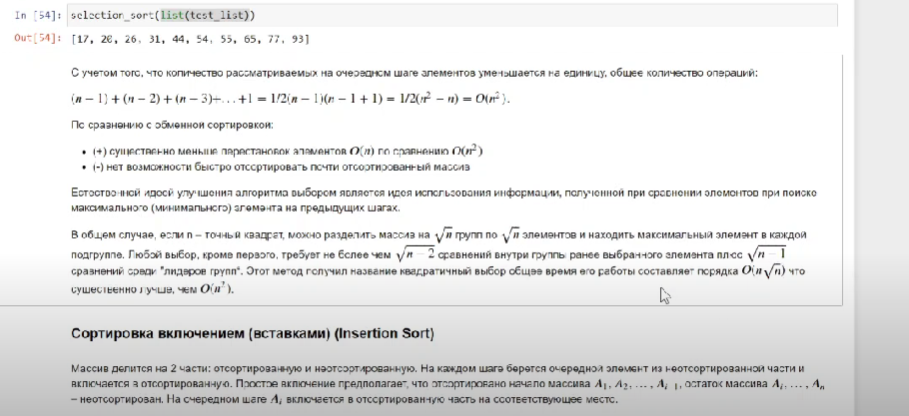

In [69]:
# обычная сортировка выбором из лекции
def selection_sort(lst):
    for fill_slot in range(len(lst)-1, 0, -1):
        pos_of_max = 0
        for location in range(1, fill_slot+1):
            if lst[location] > lst[pos_of_max]:
                pos_of_max = location
        
        lst[fill_slot], lst[pos_of_max] = lst[pos_of_max], lst[fill_slot]
    return lst

print(selection_sort([1,2,12,22,11,12,11,100,20]))

[1, 2, 11, 11, 12, 12, 20, 22, 100]


In [2]:
# модификация сортировки выбором из лекции
def stone_bubble_sort(arr):
    n = len(arr)
    sublist_length = int(n**0.5)
    while n > 1:
        k = []
        for i in range(0, n, sublist_length):
            sublist = arr[i:min(n, i+sublist_length)]
            max_index = sublist.index(max(sublist))
            max_value = sublist[max_index]
            k.append(max_value)
        max_index = arr.index(max(k))
        arr[max_index], arr[n - 1] = arr[n - 1], arr[max_index]
        n -= 1
    return arr

# Пример использования
sorted_arr = stone_bubble_sort([1,2,12,12,0,5,3,10,18,15,14,13,30])
print(sorted_arr)

[0, 1, 2, 3, 5, 10, 12, 12, 13, 14, 15, 18, 30]


## 16) ✔️ 
Реализовать быструю сортировку с возможностью подсчета операций. Сравнить производительность алгоритма на случайных и упорядоченных (и почти упорядоченных) данных.

 quick sort предполагает деление массива на две части, в одной из которых находятся элементы меньше определённого значения, в другой – больше или равные. 

In [23]:
from random import choice

In [24]:
# Быстрая сортировка, не меняем исходный список

def quick_sort(lst: list, count: list):
    if len(lst) <= 1:
        count[0] += 1
        return lst, count
    
    separator = choice(lst) # выбираем по какому числу делим список пополам (на три части, меньше больше и равно разделителю)
    lesser_lst = []
    equal_lst = []
    greater_lst = []
    
    for el in lst:
        count[0] += 1
        if el < separator:
            count[0] += 1
            lesser_lst.append(el)
        elif el == separator:
            count[0] += 2
            equal_lst.append(el)
        else:
            count[0] += 3
            greater_lst.append(el)
            
    tmp_lst1, tmp1 = quick_sort(lesser_lst, count)
    tmp_lst2, tmp2 = quick_sort(greater_lst, count)
    return tmp_lst1 + equal_lst + tmp_lst2, count
        

In [25]:
lst = [1, 10, 11, 2, 12, 122, 44, 34]
lst_sorted, count = quick_sort(lst, [0])
print(lst_sorted, *count)
# print(lst)

[1, 2, 10, 11, 12, 34, 44, 122] 85


In [36]:
# Сравнить производительность алгоритма на случайных и упорядоченных (и почти упорядоченных) данных.
print('quick_sort')
print('кол-во эл-тов,\trandom_values, almost_sorted_asc, sorted_desc, sorted_asc')
for i in range(1000, 100000, 10000):
    # кол-во операций для каждого вида списков
    lst_sorted1, count1 = quick_sort(random_values(i), [0])
    lst_sorted2, count2 = quick_sort(almost_sorted_asc(i), [0])
    lst_sorted3, count3 = quick_sort(sorted_desc(i), [0])
    lst_sorted4, count4 = quick_sort(sorted_asc(i), [0])
    
    print(f'    {i}:  \t  {count1}\t  {count2}\t  {count3}\t  {count4}')

quick_sort
кол-во эл-тов,	random_values, almost_sorted_asc, sorted_desc, sorted_asc
    1000:  	  [22010]	  [22032]	  [22600]	  [21374]
    11000:  	  [224474]	  [234104]	  [264894]	  [261818]
    21000:  	  [522656]	  [479518]	  [428766]	  [515380]
    31000:  	  [672206]	  [733488]	  [712946]	  [744110]
    41000:  	  [999948]	  [805046]	  [892120]	  [796622]
    51000:  	  [1150444]	  [1144298]	  [1098516]	  [1118024]
    61000:  	  [1294442]	  [1526220]	  [1370780]	  [1270510]
    71000:  	  [1575728]	  [1477388]	  [1660058]	  [1501326]
    81000:  	  [2047856]	  [2076458]	  [1753842]	  [1711698]
    91000:  	  [2520682]	  [1911768]	  [1834864]	  [1927940]


## 17) ✔️
Улучшить работу быстрой сортировки на упорядоченных и почти упорядоченных за счет изменения алгоритма выбора элемента для разделения массива.

решение:
Медиана из трех: Вместо того, чтобы просто выбирать первый элемент как опорный, можно использовать метод "Медиана из трех", где опорным выбирается медиана из первого, среднего и последнего элементов. Это поможет избежать худшего случая, когда массив уже отсортирован, и опорный элемент является самым маленьким или самым большим.

https://neerc.ifmo.ru/wiki/index.php?title=%D0%91%D1%8B%D1%81%D1%82%D1%80%D0%B0%D1%8F_%D1%81%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0

In [12]:
import statistics

In [19]:
def modified_qsort(lst):
    if len(lst) <= 1:
        return lst
    else:
        pivot = statistics.median([lst[0], lst[len(lst)//2], lst[-1]])  # выбор опорного элемента используя медиану
        print(pivot)
        less = [x for x in lst if x < pivot]
        equal = [x for x in lst if x == pivot]
        greater = [x for x in lst if x > pivot]
        return modified_qsort(less) + equal + modified_qsort(greater)

In [20]:
lst = [1,2,45,3,5,67,8]
print(modified_qsort(lst))

3
2
45
8
[1, 2, 3, 5, 8, 45, 67]


## 18) ✔️
Реализовать эффективный алгоритм получения из большого количества отсортированных списков одного отсортированного списка.

решение:

Алгоритм Merge объединяет два отсортированных списка в один за время 
. Для этого алгоритм повторно выбирает самый маленький элемент из оставшихся в 
 и 
 и перемещает его в растущий отсортированный список.
 
 https://education.yandex.ru/handbook/algorithms/article/razdelyaj-i-vlastvuj

In [ ]:
# идея алгоритма слияния двух отсортированных списков  -  псевдокод:
Merge(List_1,List_2):
    SortedList = ... // empty list
    while both List_1 and List_2 are non-empty:
        if the smallest element in List_1 is smaller than the smallest element in List_2:
            move the smallest element from List_1 to the end of SortedList
        else:
            move the smallest element from List_2 to the end of SortedList
    move any remaining elements from either List_1 or List_2 to the end of SortedList
    return SortedList

In [6]:
# реализация алгоритма слияния двух отсортированных списков 
def merge(inp_list_1, inp_list_2):
    list_1 = inp_list_1.copy()
    list_2 = inp_list_2.copy()
    sorted_list = []
    while list_1 and list_2 :
        min_el_1 = min(list_1)
        min_el_2 = min(list_2)
        if min_el_1 < min_el_2:
            sorted_list.append(min_el_1)
            list_1.remove(min_el_1)
        else:
            sorted_list.append(min_el_2)
            list_2.remove(min_el_2)
    if list_1:
        sorted_list = sorted_list + list_1
    if list_2:
        sorted_list = sorted_list + list_2

    return sorted_list


In [7]:
# объединяем все списки с помощью алгоритма merge
def merge_sorted_lists(lists):
    res = []
    for lst in lists:
        res = merge(res, lst)
    return res

In [8]:
# запускаем алгоритм

lists = [
    [1, 2, 3, 5, 77, 100],
    [0, 1, 2, 56, 70, 88, 110],
    [12, 123, 124],
    [0, 12, 100]
]
print(merge_sorted_lists(lists))

[0, 0, 1, 1, 2, 2, 3, 5, 12, 12, 56, 70, 77, 88, 100, 100, 110, 123, 124]


## 19)  ✔️

 Модифицировать последовательность длин шагов в сортировке Шелла.
На 2[𝑛/2𝑘]+1

т.е. при первой сортировке будут использоваться шаги: 2[n/4]+1, 2[n/8]+1, ... , 3, 1 .

In [22]:
# сортировка Шелла

def shell_sort(lst, lst_len):
    k = 2
    interval = 2*(lst_len//(2*k))+1  #  // - целая часть от деления
    
    while interval > 0:
        for i in range(interval, lst_len):
            tmp = lst[i]
            j = i
            while j >= interval and lst[j - interval] > tmp:
                lst[j] = lst[j - interval]
                j -= interval
            lst[j] = tmp
        
        if interval == 1:
            break
            
        k *= 2
        interval = 2*(lst_len//(2*k))+1


In [25]:
lst = [8, 6, 7, 2, 1, 4, 5, 3]
shell_sort(lst, len(lst))
print(lst)


[1, 2, 3, 4, 5, 6, 7, 8]
